In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import datetime
from matplotlib import pyplot as plt
import seaborn; seaborn.set()

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_9196\2749475997.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


In [16]:
nox = df['PT08.S3(NOx)'].copy().interpolate()

In [17]:
q1 = nox.quantile(0.25)
median = nox.quantile(0.5)
q3 = nox.quantile(0.75)

iqr = q3 - q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr

outliers = nox.loc[(nox > upper_fence) | (nox < lower_fence)]
print(outliers)

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


223.24110291760178
341.2411029176018
307.2411029176018
259.2411029176018
372.2411029176018
504.2411029176018
629.2411029176018
620.2411029176018
746.2411029176018
872.2411029176018
985.2411029176018
1085.241102917602
905.2411029176018
657.2411029176018
303.2411029176018
246.24110291760178
385.2411029176018
495.2411029176018
468.2411029176018
329.2411029176018
150.24110291760178
249.24110291760178
270.2411029176018
175.24110291760178
-33.75889708239822
-130.75889708239822
-89.75889708239822
124.24110291760178
492.2411029176018
732.2411029176018
421.2411029176018
414.2411029176018
563.2411029176018
847.2411029176018
1060.241102917602
1062.241102917602
852.2411029176018
554.2411029176018
64.24110291760178
-65.75889708239822
79.24110291760178
136.24110291760178
202.24110291760178
175.24110291760178
116.24110291760178
89.24110291760178
121.24110291760178
173.24110291760178
-20.75889708239822
-11.75889708239822
-208.75889708239822
-80.75889708239822
6.241102917601779
-91.75889708239822
130.2

-210.75889708239822
-277.7588970823982
-207.75889708239822
-148.75889708239822
-143.75889708239822
-114.75889708239822
-123.75889708239822
-6.758897082398221
106.24110291760178
117.24110291760178
301.2411029176018
372.2411029176018
347.2411029176018
83.24110291760178
93.24110291760178
21.24110291760178
53.24110291760178
76.24110291760178
68.24110291760178
211.24110291760178
196.24110291760178
95.24110291760178
116.24110291760178
115.24110291760178
16.24110291760178
-73.75889708239822
33.24110291760178
-105.75889708239822
-67.75889708239822
43.24110291760178
60.24110291760178
156.24110291760178
77.24110291760178
308.2411029176018
379.2411029176018
305.2411029176018
203.24110291760178
118.24110291760178
87.24110291760178
57.24110291760178
182.24110291760178
198.24110291760178
253.24110291760178
177.24110291760178
115.24110291760178
214.24110291760178
51.24110291760178
-23.75889708239822
-96.75889708239822
-43.75889708239822
7.241102917601779
25.24110291760178
90.24110291760178
70.2411029

-174.75889708239822
11.24110291760178
17.24110291760178
119.24110291760178
219.24110291760178
59.24110291760178
-35.75889708239822
-189.75889708239822
-204.75889708239822
-194.75889708239822
-190.75889708239822
-157.75889708239822
-134.75889708239822
-132.75889708239822
-109.75889708239822
-31.75889708239822
-85.75889708239822
-264.7588970823982
-326.7588970823982
-269.7588970823982
-191.75889708239822
-144.75889708239822
-144.75889708239822
-154.75889708239822
-136.75889708239822
-69.75889708239822
85.24110291760178
246.24110291760178
205.24110291760178
46.24110291760178
25.24110291760178
-207.75889708239822
-294.7588970823982
-204.75889708239822
-165.75889708239822
-65.75889708239822
-152.75889708239822
-122.75889708239822
-81.75889708239822
-109.75889708239822
-65.75889708239822
-181.75889708239822
-195.75889708239822
-252.75889708239822
-157.75889708239822
-54.75889708239822
-106.75889708239822
-184.75889708239822
-163.75889708239822
-96.75889708239822
-41.75889708239822
177.241102

146.24110291760178
146.24110291760178
47.24110291760178
23.24110291760178
-19.75889708239822
-74.75889708239822
-24.75889708239822
-13.75889708239822
12.24110291760178
19.24110291760178
11.24110291760178
149.24110291760178
266.2411029176018
348.2411029176018
224.24110291760178
33.24110291760178
-107.75889708239822
-202.75889708239822
-118.75889708239822
-118.75889708239822
-32.75889708239822
-45.75889708239822
42.24110291760178
63.24110291760178
-62.75889708239822
-109.75889708239822
-75.75889708239822
-104.75889708239822
-95.75889708239822
-83.75889708239822
-92.75889708239822
-128.75889708239822
-155.75889708239822
-103.75889708239822
-76.75889708239822
-9.75889708239822
269.2411029176018
75.24110291760178
50.24110291760178
-48.75889708239822
-201.75889708239822
-333.7588970823982
-275.7588970823982
-209.75889708239822
-145.75889708239822
-125.75889708239822
-96.75889708239822
-21.75889708239822
-24.75889708239822
-24.75889708239822
-99.75889708239822
-11.75889708239822
-39.758897082

-333.7588970823982
-307.7588970823982
-295.7588970823982
-240.75889708239822
-132.75889708239822
-89.75889708239822
13.24110291760178
86.24110291760178
82.24110291760178
301.2411029176018
239.24110291760178
196.24110291760178
149.24110291760178
48.24110291760178
-161.75889708239822
-184.75889708239822
-37.75889708239822
-47.75889708239822
-39.75889708239822
-59.75889708239822
-125.75889708239822
-6.758897082398221
-16.75889708239822
-14.75889708239822
-102.75889708239822
-124.75889708239822
-162.75889708239822
65.24110291760178
157.24110291760178
164.24110291760178
241.24110291760178
331.2411029176018
443.2411029176018
586.2411029176018
725.2411029176018
757.2411029176018
652.2411029176018
372.2411029176018
75.24110291760178
45.24110291760178
49.24110291760178
99.24110291760178
26.24110291760178
-14.75889708239822
59.24110291760178
-37.75889708239822
-106.75889708239822
-73.75889708239822
-101.75889708239822
137.24110291760178
180.24110291760178
182.24110291760178
171.24110291760178
31

753.2411029176018
845.2411029176018
1105.241102917602
479.2411029176018
583.2411029176018
650.2411029176018
833.2411029176018
917.2411029176018
935.2411029176018
942.2411029176018
665.2411029176018
459.2411029176018
38.24110291760178
8.24110291760178
77.24110291760178
99.24110291760178
78.24110291760178
76.24110291760178
104.24110291760178
97.24110291760178
41.24110291760178
-37.75889708239822
-141.75889708239822
-138.75889708239822
-147.75889708239822
13.24110291760178
136.24110291760178
196.24110291760178
202.24110291760178
280.2411029176018
345.2411029176018
558.2411029176018
628.2411029176018
648.2411029176018
497.2411029176018
236.24110291760178
-191.75889708239822
-314.7588970823982
-206.75889708239822
-177.75889708239822
204.24110291760178
232.24110291760178
-63.75889708239822
-53.75889708239822
-64.75889708239822
-159.75889708239822
-198.75889708239822
-149.75889708239822
-195.75889708239822
-161.75889708239822
-41.75889708239822
16.24110291760178
77.24110291760178
52.241102917

75.24110291760178
109.24110291760178
-57.75889708239822
-60.75889708239822
148.24110291760178
223.24110291760178
-60.75889708239822
-107.75889708239822
-145.75889708239822
-279.7588970823982
-272.7588970823982
-132.75889708239822
44.24110291760178
-4.758897082398221
-132.75889708239822
43.24110291760178
155.24110291760178
332.2411029176018
338.2411029176018
489.2411029176018
360.2411029176018
137.24110291760178
-144.75889708239822
-195.75889708239822
-148.75889708239822
-84.75889708239822
-68.75889708239822
-36.75889708239822
7.241102917601779
-137.75889708239822
-207.75889708239822
-97.75889708239822
-111.75889708239822
-122.75889708239822
-127.75889708239822
-126.75889708239822
-79.75889708239822
83.24110291760178
51.24110291760178
112.24110291760178
116.24110291760178
92.24110291760178
129.24110291760178
433.2411029176018
248.24110291760178
-72.75889708239822
-303.7588970823982
-389.7588970823982
-287.7588970823982
-141.75889708239822
-170.75889708239822
-258.7588970823982
-251.7588

-148.75889708239822
-138.75889708239822
-209.75889708239822
-168.75889708239822
-138.75889708239822
-191.75889708239822
-214.75889708239822
-176.75889708239822
-363.7588970823982
-366.7588970823982
-152.75889708239822
-21.75889708239822
81.24110291760178
182.24110291760178
159.24110291760178
279.2411029176018
494.2411029176018
516.2411029176018
319.2411029176018
96.24110291760178
-142.75889708239822
-342.7588970823982
-414.7588970823982
-304.7588970823982
-107.75889708239822
-179.75889708239822
-221.75889708239822
-259.7588970823982
-175.75889708239822
-219.75889708239822
-130.75889708239822
-182.75889708239822
-231.75889708239822
-115.75889708239822
-152.75889708239822
70.24110291760178
162.24110291760178
19.24110291760178
74.24110291760178
230.24110291760178
328.2411029176018
299.2411029176018
428.2411029176018
418.2411029176018
251.24110291760178
-113.75889708239822
-92.75889708239822
48.24110291760178
62.24110291760178
67.24110291760178
-131.75889708239822
-203.75889708239822
-194.

Datetime
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
2004-03-11 05:00:00    1918.0
2004-03-11 06:00:00    1738.0
2004-03-12 03:00:00    1680.0
                        ...  
2005-02-28 06:00:00    1665.0
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
Name: PT08.S3(NOx), Length: 111, dtype: float64

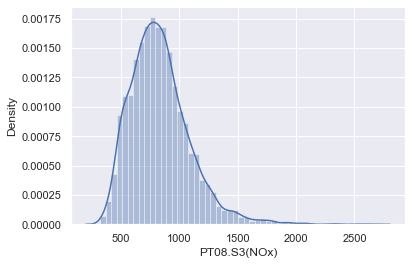

In [20]:
sns.distplot(nox)

mean = np.mean(nox)
std = np.std(nox)

outliers = []

thres = 3

for i in nox:
    z_score = (i - mean)
    if(np.abs(z_score) > thres):
        print(z_score)
        outliers.append(i)
        
outliers = nox.loc[np.abs((nox - mean) / std) > 3]
outliers